#Customer Segmentation

### Sample Data ###


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



### Data Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

### Descriptive Statistics ###
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000       

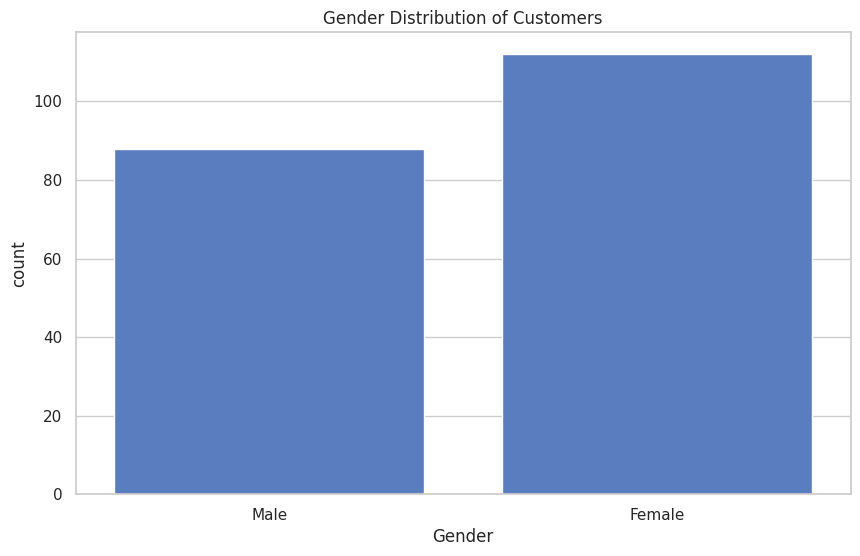


### Age Distribution ###


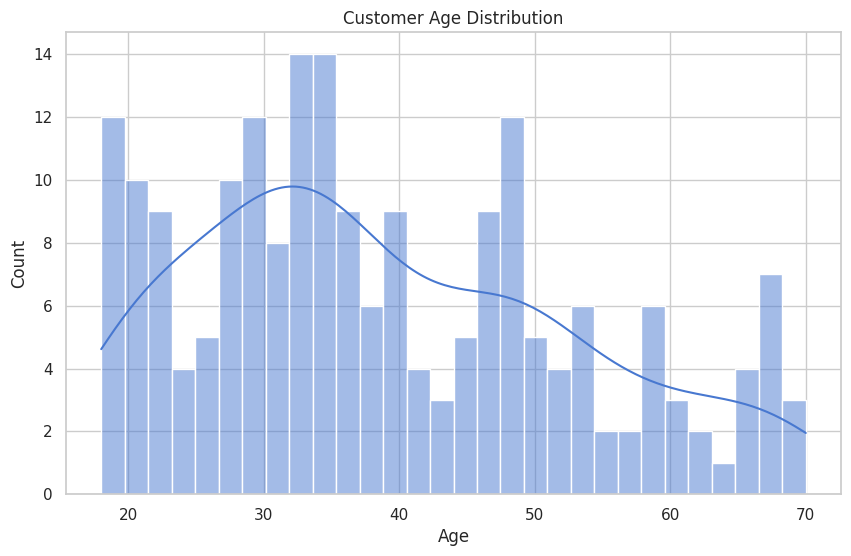


### Annual Income vs Spending Score ###


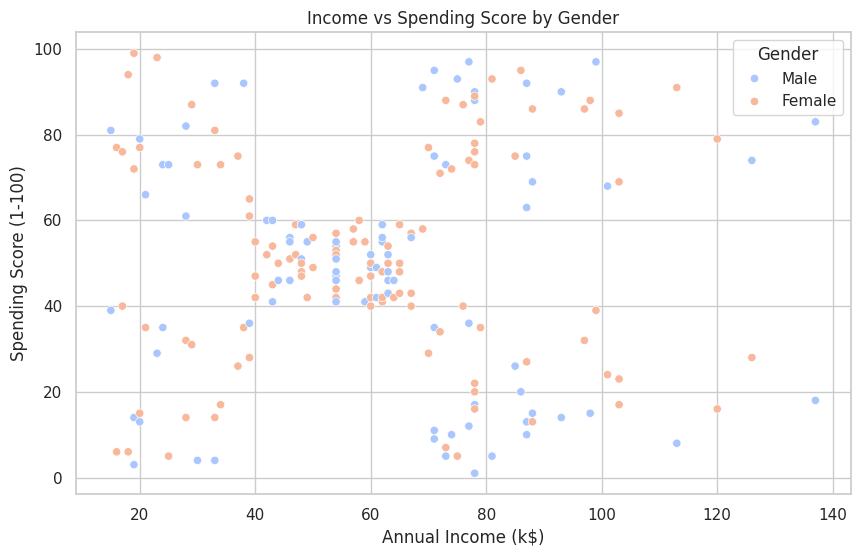


Explained variance by PCA components: [0.33690046 0.26230645]


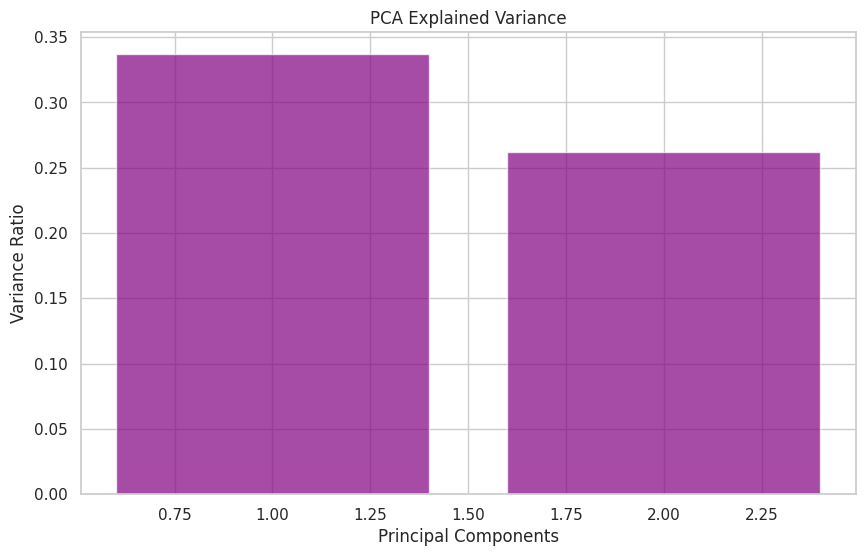

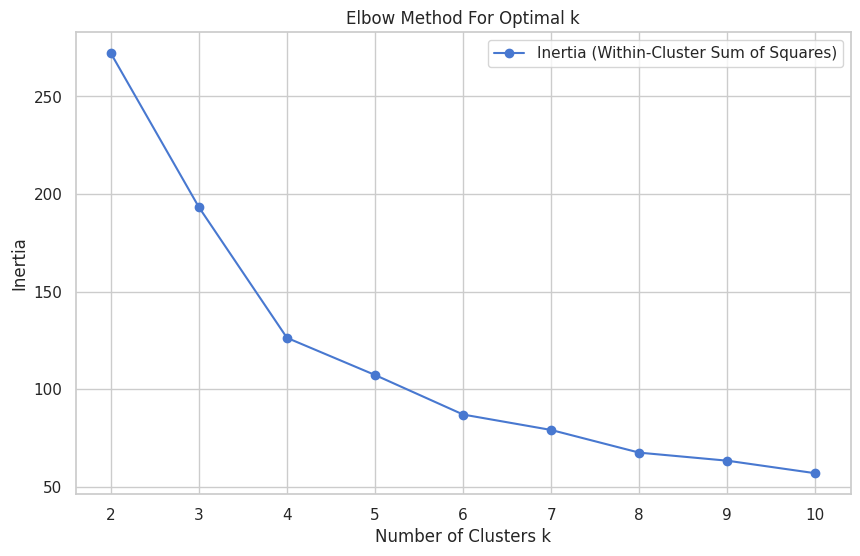

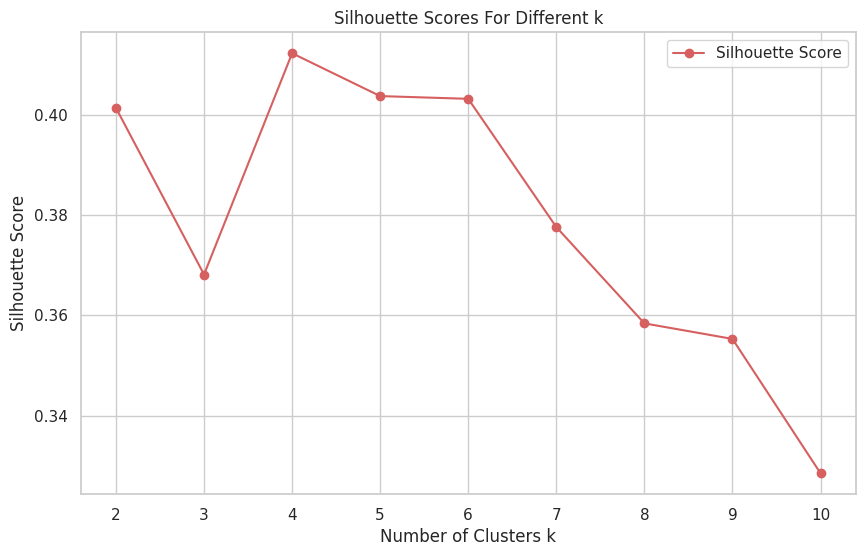


Best number of clusters by silhouette score: 4
KMeans model saved as kmeans_model.joblib


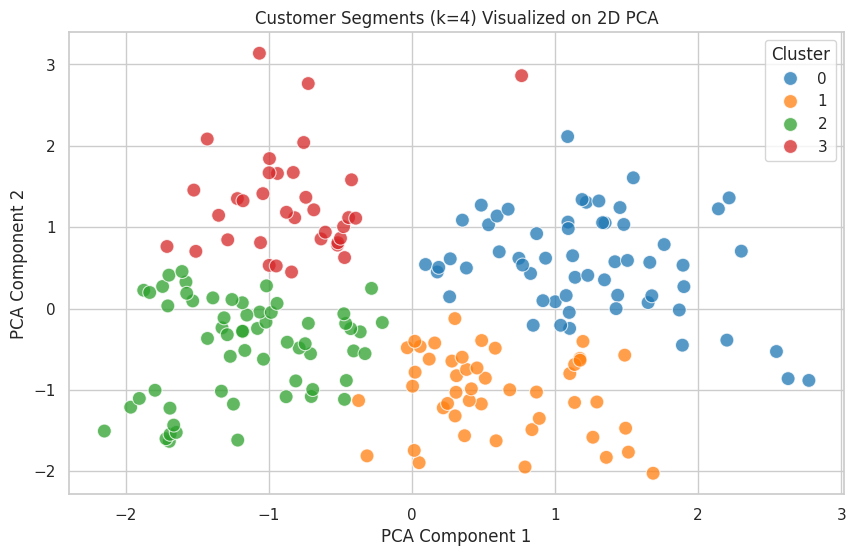


### Cluster Summary ###


CustomerID    Gender        Age            Annual Income (k$)  \
             count      mean       mean        std               mean   
Cluster                                                                 
0               58  0.775862  49.068966  12.980231          70.344828   
1               47  0.063830  47.680851  10.756406          45.212766   
2               60  0.183333  27.233333   5.585595          49.983333   
3               35  0.828571  29.971429   6.613203          83.085714   

                   Spending Score (1-100)             
               std                   mean        std  
Cluster                                               
0        23.527924              28.568966  18.403958  
1        16.944842              37.808511  16.021234  
2        23.037546              67.933333  18.009288  
3        24.319408              72.285714  18.910892

/tmp/ipython-input-4034871813.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_processed, palette=palette)


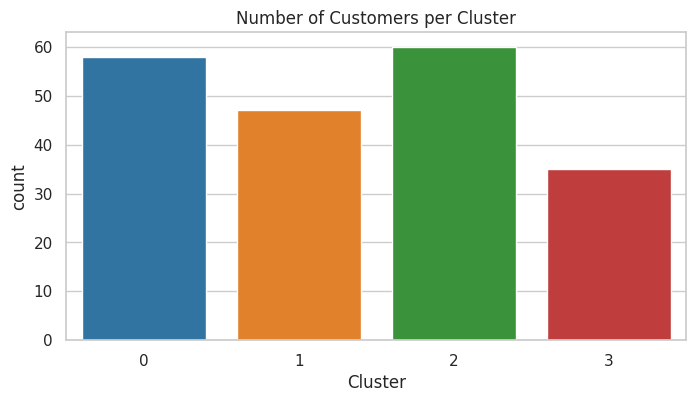

/tmp/ipython-input-4034871813.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df_processed, palette=palette, ax=axes[0])
/tmp/ipython-input-4034871813.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_processed, palette=palette, ax=axes[1])
/tmp/ipython-input-4034871813.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_processed, palette=palette, ax=axes[2])


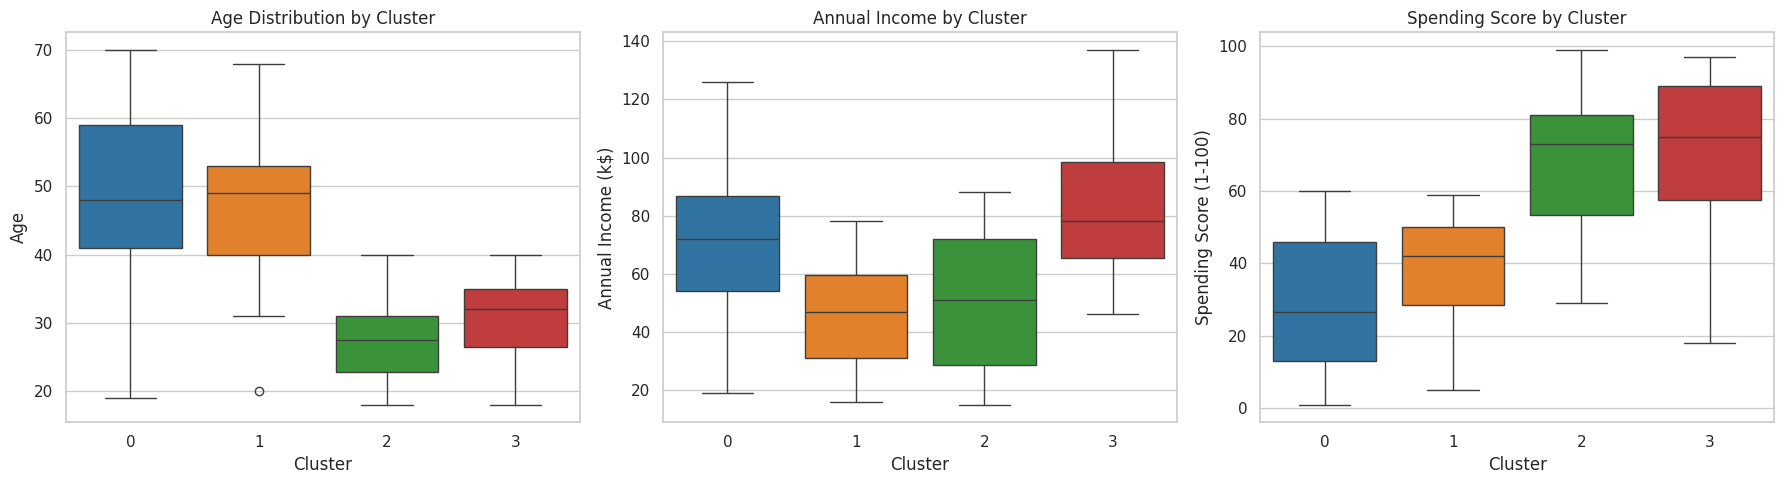


### Business Insights and Targeting Strategies ###

Cluster 0:
- Number of customers: 58.0
- Average Age: 49.1 ± 13.0
- Average Annual Income: $70345 ± $23528
- Average Spending Score: 28.6 ± 18.4
=> Strategy: Offer discounts and promotions to increase engagement.

Cluster 1:
- Number of customers: 47.0
- Average Age: 47.7 ± 10.8
- Average Annual Income: $45213 ± $16945
- Average Spending Score: 37.8 ± 16.0
=> Strategy: Personalized marketing to boost engagement and cross-selling.

Cluster 2:
- Number of customers: 60.0
- Average Age: 27.2 ± 5.6
- Average Annual Income: $49983 ± $23038
- Average Spending Score: 67.9 ± 18.0
=> Strategy: Personalized marketing to boost engagement and cross-selling.

Cluster 3:
- Number of customers: 35.0
- Average Age: 30.0 ± 6.6
- Average Annual Income: $83086 ± $24319
- Average Spending Score: 72.3 ± 18.9
=> Strategy: Target with premium loyalty programs and exclusive offers.

Segmented dataset saved as 'Mall_Customers_Segmented_Advanced.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Set plot style
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10,6)

# 1. Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')

print("### Sample Data ###")
display(df.head())

# 2. Exploratory Data Analysis (EDA)
print("\n### Data Info ###")
print(df.info())

print("\n### Descriptive Statistics ###")
print(df.describe())

print("\n### Gender Distribution ###")
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.show()

print("\n### Age Distribution ###")
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.show()

print("\n### Annual Income vs Spending Score ###")
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='coolwarm')
plt.title('Income vs Spending Score by Gender')
plt.show()

# 3. Data Preprocessing
df_processed = df.copy()

# Encode Gender: Male=1, Female=0
le = LabelEncoder()
df_processed['Gender'] = le.fit_transform(df_processed['Gender'])

features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_processed[features]

# Scale features to standard normal distribution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dimensionality Reduction with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
print(f"\nExplained variance by PCA components: {explained_var}")

plt.bar(range(1,3), explained_var, alpha=0.7, align='center', color='purple')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

# 5. Finding Optimal Number of Clusters: Elbow + Silhouette Score
inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette.append(silhouette_avg)

# Plot Elbow
plt.plot(K_range, inertia, 'bo-', label='Inertia (Within-Cluster Sum of Squares)')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.show()

# Plot Silhouette
plt.plot(K_range, silhouette, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.legend()
plt.show()

# Select best k based on silhouette (max silhouette)
best_k = K_range[np.argmax(silhouette)]
print(f"\nBest number of clusters by silhouette score: {best_k}")

# 6. K-Means Clustering with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Save model
joblib.dump(kmeans, '/content/kmeans_model.joblib')
print("KMeans model saved as kmeans_model.joblib")


# 7. Visualization of Clusters in PCA space
palette = sns.color_palette('tab10', best_k)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette=palette, s=100, alpha=0.75)
plt.title(f'Customer Segments (k={best_k}) Visualized on 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# 8. Add cluster labels to processed dataframe (with numeric gender)
df_processed['Cluster'] = clusters

# 9. Cluster Profiling: Mean values + count per cluster
cluster_summary = df_processed.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Gender': 'mean',
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
})

print("\n### Cluster Summary ###")
display(cluster_summary)

# 10. Visualize cluster profiles

# Count customers per cluster
plt.figure(figsize=(8,4))
sns.countplot(x='Cluster', data=df_processed, palette=palette)
plt.title('Number of Customers per Cluster')
plt.show()

# Boxplots for Age, Income, Spending Score per cluster
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(x='Cluster', y='Age', data=df_processed, palette=palette, ax=axes[0])
axes[0].set_title('Age Distribution by Cluster')

sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df_processed, palette=palette, ax=axes[1])
axes[1].set_title('Annual Income by Cluster')

sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df_processed, palette=palette, ax=axes[2])
axes[2].set_title('Spending Score by Cluster')

plt.tight_layout()
plt.show()

# 11. Business Insights & Targeting Strategies
print("\n### Business Insights and Targeting Strategies ###")
for i in range(best_k):
    c = cluster_summary.loc[i]
    print(f"\nCluster {i}:")
    print(f"- Number of customers: {c[('CustomerID', 'count')]}")
    print(f"- Average Age: {c[('Age', 'mean')]:.1f} ± {c[('Age', 'std')]:.1f}")
    print(f"- Average Annual Income: ${c[('Annual Income (k$)', 'mean')]*1000:.0f} ± ${c[('Annual Income (k$)', 'std')]*1000:.0f}")
    print(f"- Average Spending Score: {c[('Spending Score (1-100)', 'mean')]:.1f} ± {c[('Spending Score (1-100)', 'std')]:.1f}")

    # Targeting strategy examples
    if c[('Spending Score (1-100)', 'mean')] > 70 and c[('Annual Income (k$)', 'mean')] > 70:
        print("=> Strategy: Target with premium loyalty programs and exclusive offers.")
    elif c[('Spending Score (1-100)', 'mean')] < 40 and c[('Annual Income (k$)', 'mean')] > 60:
        print("=> Strategy: Offer discounts and promotions to increase engagement.")
    elif c[('Spending Score (1-100)', 'mean')] > 50 and c[('Annual Income (k$)', 'mean')] < 40:
        print("=> Strategy: Promote affordable, value-for-money products.")
    else:
        print("=> Strategy: Personalized marketing to boost engagement and cross-selling.")

# 12. Save final dataframe with cluster labels
df_processed.to_csv('/content/Mall_Customers_Segmented_Advanced.csv', index=False)
print("\nSegmented dataset saved as 'Mall_Customers_Segmented_Advanced.csv'")


